In [5]:
from Coloring.Coloring_Dataset import ColoringDataset
import matplotlib.pyplot as plt

In [8]:
dataset = ColoringDataset(root_path='Coloring/data/',subset='large',split='test',augment_data=False,dataset_size=-1)

Loading Images...
...images loaded, it took 0.02 seconds
Loading Graphs...
...graphs loaded, it took 0.46


Get some statistics abouth the graphs in the dataset :

In [21]:
nodes = []
edges = []

for input,graph,idx in dataset:
    
    A = graph['A']

    n_nodes = A.shape[0]
    n_edges = (A.sum()//2).item()
   
    nodes.append(n_nodes)
    edges.append(n_edges)
    
import pandas as pd

df = pd.DataFrame({'nodes':nodes,'edges':edges})

Number of nodes (min/mean/max) 15 17.4588 20
Number of edges (min/mean/max) 21.0 32.1586 44.0


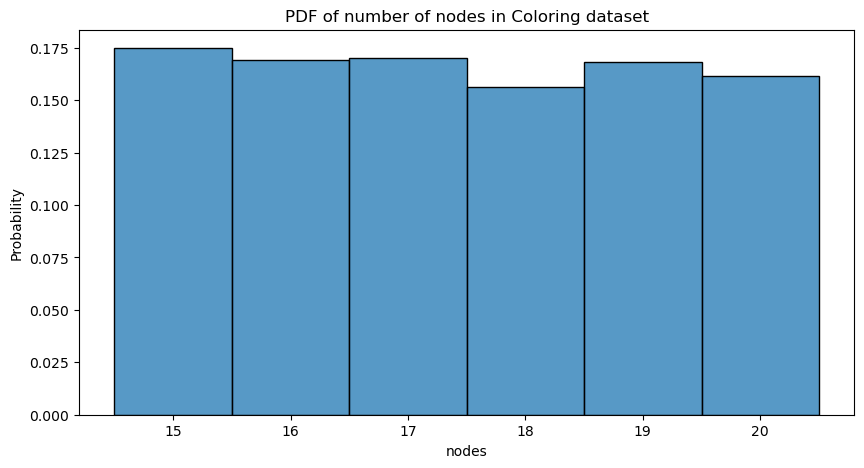

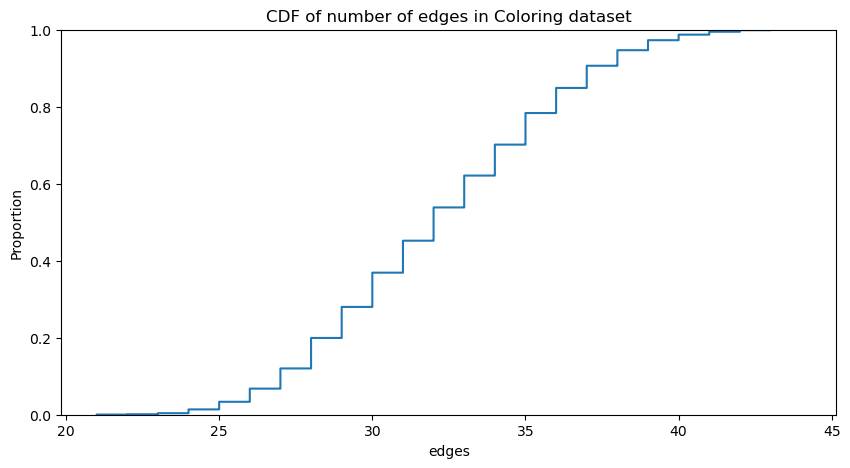

In [34]:
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="nodes",discrete=True,stat='probability')
plt.title('PDF of number of nodes in Coloring dataset')

print('Number of nodes (min/mean/max)',df['nodes'].min(),df['nodes'].mean(),df['nodes'].max())

plt.figure(figsize=(10,5))
sns.ecdfplot(data=df, x="edges")
plt.title('CDF of number of edges in Coloring dataset')


print('Number of edges (min/mean/max)',df['edges'].min(),df['edges'].mean(),df['edges'].max())




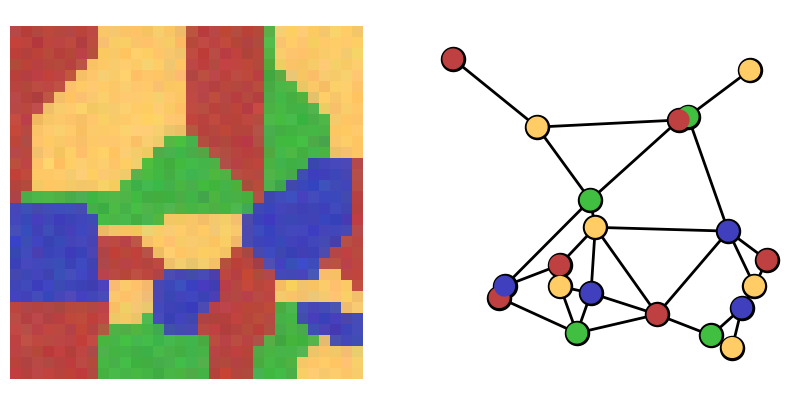

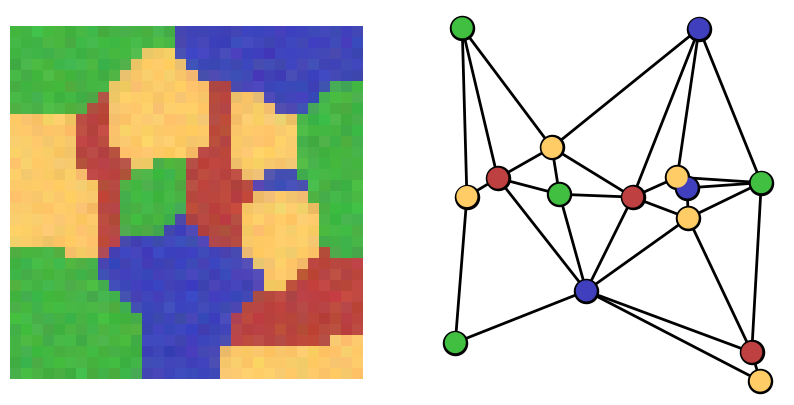

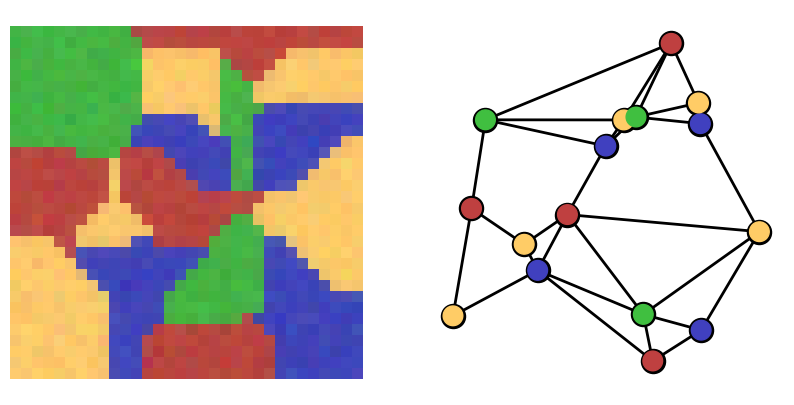

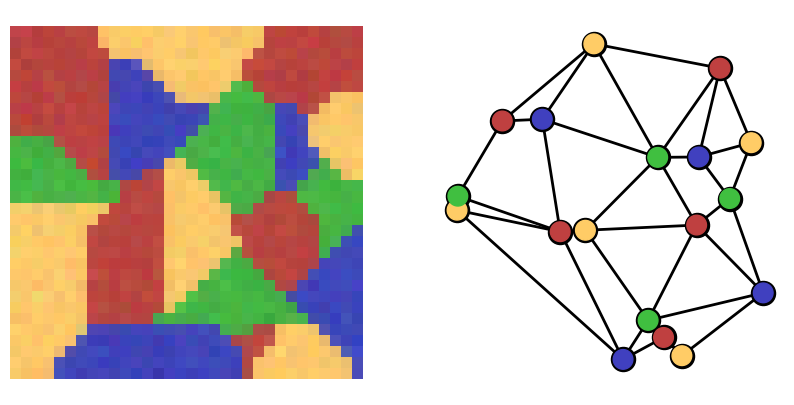

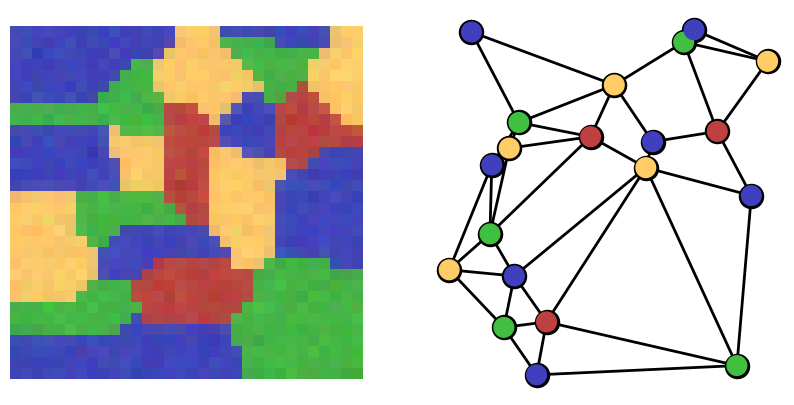

In [36]:
from random import sample

indices = sample(range(len(dataset)),5)

for idx in indices:

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    dataset.plot_img(idx,ax1)
    dataset.plot_trgt(idx,ax2)